# Lab: Extending Logistic Regression

## 1. Preparation and overview:

### 1.1 Business understanding:

&emsp; The data was integrated into a dataset and published on Kaggle https://www.kaggle.com/datasets/nancyalaswad90/diamonds-prices by Ms. Nancy Al Aswad. She hoped that the dataset she released could be a good resource of data to practice for those who need it. The original data of diamonds was collected by Baunat https://www.baunat.com/en/diamond-price which helps us understand the relationship between the price of diamonds and various attributes of diamonds. 

**User cases:**

&emsp; Our research on diamonds dataset could satisfy the user in need:
1. Whether the price given by the merchant is reasonable according to the various attributes of the diamond the customer wants.
2. What kind of diamond is affordable according to the personal budget of customer.
3. What kind of diamond is most profitable for diamonds merchant.
4. What kind of diamond is most suitable for merchant to recommand base on the average budget of all consumers.

&emsp; Our task is to classify all the diamonds in dataset into several levels according to the price per unit carat. Actually, we failed to find a reasonable classification rule based on the price per unit carat. We planned to classify all the diamonds in dataset into four level, using the minimum price per unit, the mean value of minimum and mean of all unit price, the mean value of all price per unit carat,the mean value of mean of all unit price and maximum, the maximum price per unit as boundaries. The classification result showed that there are 15391 instances in the first class, 14756 instances in the second class, 12945 instances in the third class and 7460 instances in the fourth class. We believe that the reason for this situation is that the data is densely distributed before the unit price exceeds a certain value, while after the unit price exceeds a certain value, the data is sparsely distributed. In order to maintain the stability of data distribution in all levels and improve the accuracy, we decided to combine the third and fourth class. It means that we decided to classify all the diamonds in dataset into three level, using the minimum price per unit, the mean value of minimum and mean of all unit price, the mean value of all price per unit carat, the maximum price per unit as boundaries. The accuracy is acceptable between 77 and 83 because various attributes of diamonds will affect the price per unit carat.

&emsp; In some circumstances, our model will be deployed for online analysis in the sales process. Some webshops, such as Baunat, could deploy our model to their website. Our model can offer consumers most suitable and affordable diamonds by asking requirements for diamond and their personal budget. In other circumstances, our model also could be used for offline analysis before the diamond processing. After receiving the diamond just unearthed, the diamond processing company can use our model to make a preliminary price estimate for the diamond, then process the diamond with this estimated price as the target value.

### 1.2 Define and prepare the class variables:
&emsp; First of all, we should load the same dataset from lab1.

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Diamonds Prices2022.csv')
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


&emsp; Because the index is a useless column, it can be dropped. And price is output, so it should be placed to the last column.

In [2]:
df = df.drop(['Unnamed: 0'], axis=1)
df = df[['carat', 'cut', 'color', 'clarity',
         'depth', 'table', 'x', 'y', 'z', 'price']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   x        53943 non-null  float64
 7   y        53943 non-null  float64
 8   z        53943 non-null  float64
 9   price    53943 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


&emsp; The invalid value could exist even if there is no missing. As a common understanding, length, width and height of a diamonds can not be zero. So we should drop all incorrect data row where x=0, y=0 or z=0. Besides, there are some duplicate items. We need to drop them all. Finally, According to the dataset, the weight of most diamonds in this database is less than 1.5 carats. And the main buyers of diamonds are the working class. They are more likely to accept the price of diamonds under 1.5 carats. So we decide to keep only the information of diamonds less than or equal to 1.5 carats.

In [3]:
df = df.loc[df['x'] != 0]
df = df.loc[df['y'] != 0]
df = df.loc[df['z'] != 0]

deplicate_index_list = df.duplicated()
df = df[~deplicate_index_list]
deplicate_index_list = df.duplicated()

df = df.loc[df['carat'] <= 1.5]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48364 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    48364 non-null  float64
 1   cut      48364 non-null  object 
 2   color    48364 non-null  object 
 3   clarity  48364 non-null  object 
 4   depth    48364 non-null  float64
 5   table    48364 non-null  float64
 6   x        48364 non-null  float64
 7   y        48364 non-null  float64
 8   z        48364 non-null  float64
 9   price    48364 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


&emsp; We decide to add three attributes, carat_range, and price_per_unit_range, and drop price column. The weights of diamonds are various. The reason why we introduce 'carat_range' is that the weight difference of the samples taken during comparison will not be too large.<br>
&emsp; We define the carat_range value as 0.2 if its carat value is in the range of [0.199, 0.29], as 0.3 if its carat value is in the range of [0.30, 0.39], as 0.4 if its carat value is in the range of [0.40, 0.49], as 0.5 if its carat value is in the range of [0.50, 0.59], as 0.6 if its carat value is in the range of [0.60, 0.69], as 0.7 if its carat value is in the range of [0.70, 0.79], as 0.8 if its carat value is in the range of [0.80, 0.89], as 0.9 if its carat value is in the range of [0.90, 0.99], as 1.0 if its carat value is in the range of [1.0, 1.09], as 1.1 if its carat value is in the range of [1.10, 1.19], as 1.2 if its carat value is in the range of [1.20, 1.29], as 1.3 if its carat value is in the range of [1.30, 1.39], as 1.4 if its carat value is in the range of [1.40, 1.49] and as 1.5 if its carat value is in the range of [1.5, 1.59].<br>
&emsp; 'price_per_unit_range' only gets 0, 1 and 2 value. 0 value represents ... . 1 value represents ... . 2 value represents ... .

In [4]:
df['carat_range'] = pd.cut(df['carat'],
                           [0.199, 0.3, 0.4, 0.5, 0.6, 0.7,
                            0.8, 0.9, 1.0, 1.1, 1.2,
                            1.3, 1.4, 1.5],
                           labels=[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,\
                                   0.9, 1.0, 1.1, 1.2, 1.3, 1.4])
df['price_per_unit'] = df['price'] / df['carat']

df_sub = df.loc[df['price_per_unit'] <= df.price_per_unit.mean()]
df['price_per_unit_range'] = pd.cut(df['price_per_unit'],
                                    [0, df_sub.price_per_unit.mean(),
                                     df.price_per_unit.mean(),
                                     float("inf")],labels=[0, 1, 2])

df = df.drop(["carat"], axis=1)
df = df.drop(['price'], axis=1)
df = df.drop(["price_per_unit"], axis=1)

df.columns = ['cut_value', 'color', 'clarity', 'depth', 'table', 'x', 'y',
              'z', 'carat_range', 'price_per_unit_range']
df = df[['carat_range', 'cut_value', 'color', 'clarity', 'depth', 'table',
         'x', 'y', 'z', 'price_per_unit_range']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48364 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   carat_range           48364 non-null  category
 1   cut_value             48364 non-null  object  
 2   color                 48364 non-null  object  
 3   clarity               48364 non-null  object  
 4   depth                 48364 non-null  float64 
 5   table                 48364 non-null  float64 
 6   x                     48364 non-null  float64 
 7   y                     48364 non-null  float64 
 8   z                     48364 non-null  float64 
 9   price_per_unit_range  48364 non-null  category
dtypes: category(2), float64(5), object(3)
memory usage: 3.4+ MB


&emsp; We decide to use 4 to represent Ideal, 3 to represent Premium, 2 to represent Very Good, 1 to reprecent Good and 0 to represent Fair. The higher the value, the higher the cut level.<br>
&emsp; We decide to use 6 to represent D, 5 to represent E, 4 to represent F, 3 to reprecent G, 2 to reprecent H, 1 to reprecent I and 0 to represent J. The higher the value, the higher the color level.<br>
&emsp; We decide to use 7 to represent IF, 6 to represent VVS1, 5 to represent VVS2, 4 to reprecent VS1, 3 to reprecent VS2, 2 to reprecent SI1, 1 to represent SI2 and 0 to represent I1. The higher the value, the higher the clarity level.<br>
&emsp; We know the maximum value of depth is 79 percent and the minimum value is 43 percent. Because the ideal diamond depth is between 58 and 63 percent. We will define the depth level as 3 if this depth value is in the range of [58, 63], as 2 if this depth value is in the range of [53, 57] or [64, 68], as 1 if this depth value is in the range of [47, 52] or [69, 73], as 0 if this depth value is in the range of [41, 46] or [74, 79].<br>
&emsp; As we can see, the maximum value of table is 95 percent and the minimum value is 43 percent.Because the ideal table takes up 60 to 69 percent of the width of the diamond. We will define the table level as 3 when this table value laid in the range of [60, 69], as 2 when this table value laid in the range of [50, 59] or [70, 79], as 1 when this table value laid in the range of [40, 49] or [80, 89], as 0 when this table value laid in the range of [30, 39] or [90, 100].

In [5]:
dic_cut = {'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4}
df['cut_value'] = df.cut_value.map(dic_cut)

dic_color = {'J':0, 'I':1, 'H':2, 'G':3, 'F':4, 'E':5, 'D':6}
df['color'] = df.color.map(dic_color)

dic_clarity = {'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7}
df['clarity'] = df.clarity.map(dic_clarity)

df['depth'] = pd.cut(df['depth'],[41.0, 47.0, 53.0, 58.0, 64.0, 69.0, 74.0, 79.0],
                     labels=[0, 1, 2, 3, 2, 1, 0],
                     ordered=False)

df['table'] = pd.cut(df['table'],[30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0],
                     labels=[0, 1, 2, 3, 2, 1, 0],
                     ordered=False)

df.head()

,carat_range,cut_value,color,clarity,depth,table,x,y,z,price_per_unit_range
0,0.2,4,5,1,3,2,3.95,3.98,2.43,0
1,0.2,3,5,2,3,3,3.89,3.84,2.31,0
2,0.2,1,5,4,2,3,4.05,4.07,2.31,0
3,0.2,3,1,3,3,2,4.20,4.23,2.63,0
4,0.3,1,0,1,3,2,4.34,4.35,2.75,0


&emsp; Becauce x, y and z are included in depth and table, they can be dropped.

In [6]:
df = df.drop(["x"], axis=1)
df = df.drop(["y"], axis=1)
df = df.drop(["z"], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48364 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   carat_range           48364 non-null  category
 1   cut_value             48364 non-null  int64   
 2   color                 48364 non-null  int64   
 3   clarity               48364 non-null  int64   
 4   depth                 48364 non-null  category
 5   table                 48364 non-null  category
 6   price_per_unit_range  48364 non-null  category
dtypes: category(4), int64(3)
memory usage: 1.7 MB


&emsp; Convert type category to type int.

In [7]:
df.carat_range = df.carat_range.astype(np.float)
df.depth = df.depth.astype(np.int)
df.table = df.table.astype(np.int)
df.price_per_unit_range = df.price_per_unit_range.astype(np.int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48364 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   carat_range           48364 non-null  float64
 1   cut_value             48364 non-null  int64  
 2   color                 48364 non-null  int64  
 3   clarity               48364 non-null  int64  
 4   depth                 48364 non-null  int32  
 5   table                 48364 non-null  int32  
 6   price_per_unit_range  48364 non-null  int32  
dtypes: float64(1), int32(3), int64(3)
memory usage: 2.4 MB


&emsp; Carat represents the weight of a diamond.<br> 
&emsp; Cut represents the balance of proportion, symmetry and polishing of the finished diamond after the diamond cutter finishes cutting the diamond.<br>
&emsp; Color represents the natural color of a diamond.<br>
&emsp; Clarity reprensents the purity level of a diamond, or the amount of impurities in a diamond.<br>
&emsp; Depth represents the percentage of diamond height divided by average waist diameter of diamond <br>
&emsp; Table represents the proportion of diamond top plane area to diamond overall plane area<br>
&emsp; Price per unit range represents the value of a diamond.

In [8]:
data_description = pd.DataFrame()
data_description['Features'] = df.columns
data_description['Description'] = ['Weight range', 'Diamonds cut quality', 'Diamonds color', 
                                   'Clarity of diamonds', 'Depth(z)/Length(x) of diamonds',
                                   'The width of the table as a percentage of the total \
                                    midth of the diamonds', 'diamonds price per unit range']
data_description['Scales'] = ['ordinal', 'ordinal', 'ordinal',
                              'ordinal', 'nominal', 'nominal', 'ordinal']
data_description['Discrete/Continues'] = ['discrete', 'discrete', 'discrete',
                                          'discrete', 'discrete','discrete','discrete']
data_description['Range'] = ['0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5',
                             '0:Fair, 1:Good, 2:Very Good, 3:Premium, 4:Ideal',
                             '0:J, 1:I, 2:H, 3:G, 4:F, 5:E, 6:D',
                             '0:I1, 1:SI2, 2:SI1, 3: VS2, 4:VS1, 5:VVS2, 6:VVS1, 7:IF',
                             '0:41-46 or 74-79, 1:47-52 or 69-73, 2:53-57 or 64-68, 3:58-63',
                             '0:30-39 or 90-99, 1:40-49 or 80-89, 2:50-59 or 70-79, 3:60-69',
                             '0:Small values, 1:Medium values, 2:Large values, 3:Extra large values']

data_description

,Features,Description,Scales,Discrete/Continues,Range
0,carat_range,Weight range,ordinal,discrete,"0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1..."
1,cut_value,Diamonds cut quality,ordinal,discrete,"0:Fair, 1:Good, 2:Very Good, 3:Premium, 4:Ideal"
2,color,Diamonds color,ordinal,discrete,"0:J, 1:I, 2:H, 3:G, 4:F, 5:E, 6:D"
3,clarity,Clarity of diamonds,ordinal,discrete,"0:I1, 1:SI2, 2:SI1, 3: VS2, 4:VS1, 5:VVS2, 6:V..."
4,depth,Depth(z)/Length(x) of diamonds,nominal,discrete,"0:41-46 or 74-79, 1:47-52 or 69-73, 2:53-57 or..."
5,table,The width of the table as a percentage of the ...,nominal,discrete,"0:30-39 or 90-99, 1:40-49 or 80-89, 2:50-59 or..."
6,price_per_unit_range,diamonds price per unit range,ordinal,discrete,"0:Small values, 1:Medium values, 2:Large value..."


In [9]:
import sklearn
import eli5

x = df.iloc[:,:-1]
y = df.iloc[:,-1]
model = sklearn.ensemble.RandomForestRegressor().fit(x,y)
perm = eli5.sklearn.PermutationImportance(model).fit(x, y)
eli5.show_weights(perm, feature_names = x.columns.tolist())

Weight,Feature
1.8480 ± 0.0096,carat_range
0.3351 ± 0.0027,clarity
0.1838 ± 0.0056,color
0.0544 ± 0.0010,cut_value
0.0088 ± 0.0004,table
0.0054 ± 0.0001,depth


&emsp; We can find some features is unnecessary from the above graph, so we will choose the important features as the new dataset.

In [10]:
df = df[['carat_range', 'clarity', 'color', 'price_per_unit_range']]

df.head()

,carat_range,clarity,color,price_per_unit_range
0,0.2,1,5,0
1,0.2,2,5,0
2,0.2,4,5,0
3,0.2,3,1,0
4,0.3,1,0,0


### 1.3 Divide the data:

&emsp; Split dataset into training set and test set.

In [11]:
from sklearn.model_selection import train_test_split

x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((38691, 3), (9673, 3), (38691,), (9673,))

In [12]:
df['price_per_unit_range'].value_counts()

2    19637
1    14421
0    14306
Name: price_per_unit_range, dtype: int64

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression as SKLogisticRegression
sk_lr_model = SKLogisticRegression()
sk_lr_model.fit(x_train,y_train)
yhat = sk_lr_model.predict(x_test)
print(f'The accuracy is: {accuracy_score(y_test,yhat)}')

The accuracy is: 0.8128812157551949


&emsp; According to the above information, the data distribution is relatively stable in attribute 'price_per_unit_range' and the predict accuracy is higher than eighty percent, which is a sufficient result, even though the total sample numbers is large. Therefore, we can conduct that the ratio of 80 to 20 is a proper split.

&emsp; The Interaction of cross validation:

In [14]:
from sklearn.model_selection import ShuffleSplit

if 'price_per_unit_range' in df:
    y = df['price_per_unit_range'].values
    del df['price_per_unit_range']
    norm_features = ['carat_range', 'clarity', 'color']
    df[norm_features] = (df[norm_features] - df[norm_features].mean()) / df[norm_features].std()
    x = df.to_numpy()

num_cv_iterations = 20
num_instances = len(y)
cv_object = ShuffleSplit(n_splits = num_cv_iterations, test_size = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=20, random_state=None, test_size=0.2, train_size=None)


In [15]:
from sklearn import metrics as mt

lr_clf = SKLogisticRegression()
iter_num = 0
validation = []


for train_indices, test_indices in cv_object.split(x,y): 
    x_train = x[train_indices]
    y_train = y[train_indices]
    
    x_test = x[test_indices]
    y_test = y[test_indices]
    
    lr_clf.fit(x_train,y_train)
    y_hat = lr_clf.predict(x_test)

    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print(f"====Iteration {iter_num}====")
    print(f"accuracy: {acc}")
    validation.append(acc)
    print(f"confusion matrix:\n {conf}\n")
    iter_num+=1

print(f'the variance is: {np.var(validation)}')
print(f'the standard deviations is: {np.std(validation)}')

====Iteration 0====
accuracy: 0.810400082704435
confusion matrix:
 [[2380  478   13]
 [ 539 1961  357]
 [   6  441 3498]]

====Iteration 1====
accuracy: 0.8158792515248631
confusion matrix:
 [[2397  459    9]
 [ 534 1953  367]
 [   5  407 3542]]

====Iteration 2====
accuracy: 0.8140184017367932
confusion matrix:
 [[2355  459   15]
 [ 531 1984  361]
 [   9  424 3535]]

====Iteration 3====
accuracy: 0.8078155691098935
confusion matrix:
 [[2336  499   17]
 [ 547 1981  354]
 [   7  435 3497]]

====Iteration 4====
accuracy: 0.8137082601054482
confusion matrix:
 [[2406  475    9]
 [ 536 1987  314]
 [   7  461 3478]]

====Iteration 5====
accuracy: 0.8223922257831077
confusion matrix:
 [[2357  446    7]
 [ 494 2090  327]
 [   5  439 3508]]

====Iteration 6====
accuracy: 0.8135014990178848
confusion matrix:
 [[2349  499   12]
 [ 522 2007  338]
 [   4  429 3513]]

====Iteration 7====
accuracy: 0.8159826320686446
confusion matrix:
 [[2333  484   12]
 [ 516 2030  342]
 [   5  421 3530]]

====Itera

&emsp; We repeated the cross validation 20 times above. As we can see, the accuracy of every iteration is quite similar. And the accuracy of all 20 iterations is greater than eighty percent. What's more, the variance and standard deviations of 20 iterations is extremely small. These evidences could make our conclusion, which is the ratio of 80 to 20 is a proper split, more believable.

# 2. Modeling:

## 2.1 Creating the logistic regression classifier:

&emsp; In this part, we have implemented our one-versus-all classifier using LineSeach, Stochastic, Hessian and BFGS methods base on code provided on class.

### 2.1.1 Binary logistic regression:

In [16]:
from scipy.special import expit

class BinaryLogisticRegression:
    def __init__(self, eta, iterations=20, C=0.001, regularization=None):
        self.eta = eta
        self.iters = iterations
        self.C = C
        self.regularization = regularization
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'Binary Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained Binary Logistic Regression Object'
    
    # convenience, private:
    @staticmethod
    def _add_bias(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term
    
    @staticmethod
    def _sigmoid(theta):
        # increase stability, redefine sigmoid operation
        return expit(theta) #1/(1+np.exp(-theta))
    
    # vectorized gradient calculation with regularization using L2 Norm
    def _get_gradient(self,X,y):
        ydiff = y-self.predict_proba(X,add_bias=False).ravel() # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        
        gradient = gradient.reshape(self.w_.shape)
        
        if self.regularization == 'L1':
            gradient[1:] += -self.C
        elif self.regularization == 'L2':
            gradient[1:] += -2 * self.w_[1:] * self.C
        elif self.regularization == 'L1&L2':
            gradient[1:] += -self.C -2 * self.w_[1:] * self.C
        
        return gradient
    
    # public:
    def predict_proba(self,X,add_bias=True):
        # add bias term if requested
        Xb = self._add_bias(X) if add_bias else X
        return self._sigmoid(Xb @ self.w_) # return the probability y=1
    
    def predict(self,X):
        return (self.predict_proba(X)>0.5) #return the actual prediction
    
    
    def fit(self, X, y):
        Xb = self._add_bias(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros
        
        # for as many as the max iterations
        for _ in range(self.iters):
            gradient = self._get_gradient(Xb,y)
            self.w_ += gradient*self.eta # multiply by learning rate 
            # add bacause maximizing

### 2.1.2 Steepest ascent logistic regression:

In [17]:
from scipy.optimize import minimize_scalar
import copy
from numpy import ma # (masked array) this has most numpy functions that work with NaN data.
class LineSearchLogisticRegression(BinaryLogisticRegression):
    # define custom line search for problem
    def __init__(self, line_iters=0.0, **kwds):        
        self.line_iters = line_iters
        # but keep other keywords
        super().__init__(**kwds) # call parent initializer
    
    # this defines the function with the first input to be optimized
    # therefore eta will be optimized, with all inputs constant
    @staticmethod
    def objective_function(eta, X, y, w, grad, C, regularization=None):
        wnew = w - grad*eta
        g = expit(X @ wnew)
        
        if regularization == 'L1':
            return -np.sum(ma.log(g[y==1]))-ma.sum(np.log(1-g[y==0])) + C*sum(abs(wnew))
        elif regularization == 'L2':
            return -np.sum(ma.log(g[y==1]))-ma.sum(np.log(1-g[y==0])) + C*sum(wnew**2)
        elif regularization == 'L1&L2':
            return -np.sum(ma.log(g[y==1]))-ma.sum(np.log(1-g[y==0])) + C*sum(abs(wnew)) + C*sum(wnew**2)
        else:
            return -np.sum(ma.log(g[y==1]))-ma.sum(np.log(1-g[y==0]))
        
    def fit(self, X, y):
        Xb = self._add_bias(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros
        
        # for as many as the max iterations
        for _ in range(self.iters):
            gradient = -self._get_gradient(Xb,y)
            # minimization inopposite direction
            
            # do line search in gradient direction, using scipy function
            opts = {'maxiter':self.line_iters} # unclear exactly what this should be
            res = minimize_scalar(self.objective_function, # objective function to optimize
                                  bounds=(0,self.eta*10), #bounds to optimize
                                  args=(Xb,y,self.w_,gradient,self.C), # additional argument for objective function
                                  method='bounded', # bounded optimization for speed
                                  options=opts) # set max iterations
            
            eta = res.x # get optimal learning rate
            self.w_ -= gradient*eta # set new function values
            # subtract to minimize

### 2.1.3 Stochastic gradient ascent logistic regression:¶

In [18]:
class StochasticLogisticRegression(BinaryLogisticRegression):
    # stochastic gradient calculation 
    def _get_gradient(self,X,y):
        idx = int(np.random.rand()*len(y)) # grab random instance
        ydiff = y[idx]-self.predict_proba(X[idx],add_bias=False) # get y difference (now scalar)
        gradient = X[idx] * ydiff[:,np.newaxis] # make ydiff a column vector and multiply through
        
        gradient = gradient.reshape(self.w_.shape)
        
        if self.regularization == 'L1':
            gradient[1:] += -self.C
        elif self.regularization == 'L2':
            gradient[1:] += -2 * self.w_[1:] * self.C
        elif self.regularization == 'L1&L2':
            gradient[1:] += -self.C -2 * self.w_[1:] * self.C
        
        return gradient

### 2.1.4 Newton's method:

In [19]:
from numpy.linalg import pinv
class HessianBinaryLogisticRegression(BinaryLogisticRegression):
    # just overwrite gradient function
    def _get_gradient(self,X,y):
        g = self.predict_proba(X,add_bias=False).ravel() # get sigmoid value for all classes
        hessian = X.T @ np.diag(g*(1-g)) @ X
        
        ydiff = y-g # get y difference
        gradient = np.sum(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        gradient = gradient.reshape(self.w_.shape)

        if self.regularization == 'L1':
            hessian = X.T @ np.diag(g*(1-g)) @ X
            gradient[1:] += -self.C
        elif self.regularization == 'L2':
            hessian = X.T @ np.diag(g*(1-g)) @ X - 2 * self.C # calculate the hessian
            gradient[1:] += -2 * self.w_[1:] * self.C
        elif self.regularization == 'L1&L2':
            hessian = X.T @ np.diag(g*(1-g)) @ X - self.C
            gradient[1:] += -self.C -2 * self.w_[1:] * self.C
        
        return pinv(hessian) @ gradient

### 2.1.5 Quasi-Newton Methods:

In [20]:
from scipy.optimize import fmin_bfgs # maybe the most common bfgs algorithm in the world
from numpy import ma
class BFGSBinaryLogisticRegression(BinaryLogisticRegression):
    
    @staticmethod
    def objective_function(w, X, y, C, regularization=None):
        g = expit(X @ w)
        # invert this because scipy minimizes, but we derived all formulas for maximzing
        
        if regularization == 'L1':
            return -np.sum(ma.log(g[y==1]))-ma.sum(np.log(1-g[y==0])) + C*sum(abs(wnew))
        elif regularization == 'L2':
            return -np.sum(ma.log(g[y==1]))-ma.sum(np.log(1-g[y==0])) + C*sum(wnew**2)
        elif regularization == 'L1&L2':
            return -np.sum(ma.log(g[y==1]))-ma.sum(np.log(1-g[y==0])) + C*sum(abs(wnew)) + C*sum(wnew**2)
        else:
            return -np.sum(ma.log(g[y==1]))-ma.sum(np.log(1-g[y==0]))

    @staticmethod
    def objective_gradient(w, X, y, C, regularization=None):
        g = expit(X @ w)
        ydiff = y-g # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0)
        gradient = gradient.reshape(w.shape)
        
        if regularization == 'L1':
            gradient[1:] += -self.C
        elif regularization == 'L2':
            gradient[1:] += -2 * self.w_[1:] * self.C
        elif regularization == 'L1&L2':
            gradient[1:] += -self.C -2 * self.w_[1:] * self.C
        
        return -gradient
    
    # just overwrite fit function
    def fit(self, X, y):
        Xb = self._add_bias(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = fmin_bfgs(self.objective_function, # what to optimize
                            np.zeros((num_features,1)), # starting point
                            fprime=self.objective_gradient, # gradient function
                            args=(Xb,y,self.C), # extra args for gradient and objective function
                            gtol=1e-03, # stopping criteria for gradient, |v_k|
                            maxiter=self.iters, # stopping criteria iterations
                            disp=False)
        
        self.w_ = self.w_.reshape((num_features,1))

### 2.1.6 BFGS and Newton's Method for Multiclass Logistic Regression:

In [21]:
# allow for the user to specify the algorithm they want to sovle the binary case
class MultiClassLogisticRegression:
    def __init__(self, eta, iterations=20, 
                 C=0.0001, 
                 solver=None,
                 regularization=None,
                 line_iters=0.0):
        self.eta = eta
        self.iters = iterations
        self.C = C
        self.solver = solver
        self.classifiers_ = []
        self.regularization = regularization
        self.line_iters = line_iters
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'MultiClass Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained MultiClass Logistic Regression Object'
        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.sort(np.unique(y)) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = []
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = np.array(y==yval).astype(int) # create a binary problem
            # train the binary classifier for this class
            
            if self.solver == LineSearchLogisticRegression:
                hblr = self.solver(eta=self.eta,
                                   iterations=self.iters,
                                   C=self.C,
                                   regularization = self.regularization,
                                   line_iters = self.line_iters)
            elif self.solver == StochasticLogisticRegression:
                hblr = self.solver(eta=self.eta,
                                   iterations=self.iters,
                                   C=self.C,
                                   regularization = self.regularization)
            elif self.solver == HessianBinaryLogisticRegression:
                hblr = self.solver(eta=self.eta,
                                   iterations=self.iters,
                                   C=self.C,
                                   regularization = self.regularization)
            elif self.solver == BFGSBinaryLogisticRegression:
                hblr = self.solver(eta=self.eta,
                                   iterations=self.iters,
                                   C=self.C,
                                   regularization = self.regularization)
            
            hblr.fit(X,y_binary)

            # add the trained classifier to the list
            self.classifiers_.append(hblr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T
        
    def predict_proba(self,X):
        probs = []
        for hblr in self.classifiers_:
            probs.append(hblr.predict_proba(X).reshape((len(X),1))) # get probability for each classifier
        
        return np.hstack(probs) # make into single matrix
    
    def predict(self,X):
        return np.argmax(self.predict_proba(X),axis=1) # take argmax along row

## 2.2 Training classifier:

&emsp; In this part, we decide to define the number of iterations as 10. Because we are implementing our model base on a dataset which has approximately 50 thousand instances. If we choose to train it for too many iterations, it would take too much time for Jupyter to process.

In [22]:
iterations_num = 10
object_list = ShuffleSplit(n_splits=iterations_num, train_size=0.8, test_size=0.2)

def trainingModel(eta, C, solver, regularization, line_iters=0.0):
    lr_clf = MultiClassLogisticRegression(eta=eta, iterations=10, 
                                                     C=C, solver=solver,
                                                     regularization=regularization,
                                                     line_iters = line_iters) # get object
    
    accuracy = []
    accuracy_mean = 0
    i = 0
    
    for train_indices, test_indices in object_list.split(x,y):
        lr_clf.fit(x[train_indices], y[train_indices])  # train object
        y_hat = lr_clf.predict(x[test_indices]) # get test set predictions
        accuracy.append(mt.accuracy_score(y[test_indices],y_hat))
        if solver == HessianBinaryLogisticRegression:
            if i == 0:
                break
    
    accuracy_mean = np.mean(accuracy)
    
    return accuracy, accuracy_mean

eta_list = np.logspace(-4,0,10)
C_list = np.logspace(-4,0,10)
regularization_list = [None, 'L1', 'L2', 'L1&L2']
line_iters = 2

### 2.2.1 Steepest ascent logistic regression model:

&emsp; The optimal parameters selection:

In [23]:
solver_name = LineSearchLogisticRegression

accuracy_max = -1
accuracy_list = []
accuracy_mean_list = []
result_eta_steepest = 0
result_c_steepest = 0
result_regularization_steepest = None

for eta in eta_list:
    for C in C_list:
        for regularization in regularization_list:
            accuracy, accuracy_mean = trainingModel(eta, C, solver_name, regularization)
            accuracy_list.append(accuracy)
            accuracy_mean_list.append(accuracy_mean)
            if accuracy_max <= accuracy_mean:
                accuracy_max = accuracy_mean
                result_eta_steepest = eta
                result_c_steepest = C
                result_regularization_steepest = regularization

print(f"best eta is: {result_eta_steepest}")
print(f"best C is: {result_c_steepest}")
print(f"best regularization is: {result_regularization_steepest}")
print(f"best accuracy max is: {accuracy_max}")

best eta is: 1.0
best C is: 0.005994842503189409
best regularization is: None
best accuracy max is: 0.7870050656466454


&emsp; Visualize the performance of the classifier with different C when eta and regularization are the best values:

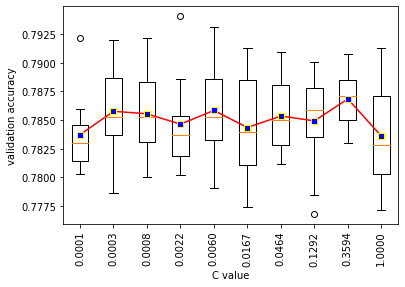

In [24]:
import matplotlib.pyplot as plt

accuracy_list = []
accuracy_mean_list = []
for C in C_list:
        accuracy, accuracy_mean = trainingModel(result_eta_steepest, C, solver_name, result_regularization_steepest)
        accuracy_list.append(accuracy)
        accuracy_mean_list.append(np.mean(accuracy_mean))

plt.boxplot(accuracy_list)
plt.xticks(range(1,len(C_list)+1),['%.4f'%(c) for c in C_list],rotation='vertical')
plt.plot(range(1,len(C_list)+1),accuracy_mean_list,c = 'red')
plt.scatter(range(1,len(C_list)+1), accuracy_mean_list, marker='s',
            s=30,edgecolor='yellow',facecolor='blue',zorder=3)

plt.xlabel('C value')
plt.ylabel('validation accuracy')
plt.show()

&emsp; Visualize the performance of the classifier with different eta when C and regularization are the best values:

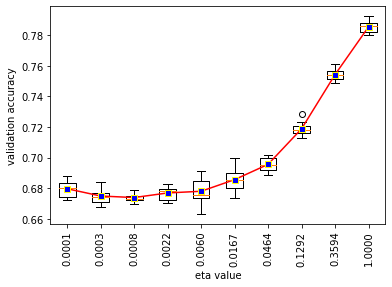

In [25]:
accuracy_list = []
accuracy_mean_list = []
for eta in eta_list:
        accuracy, accuracy_mean = trainingModel(eta, result_c_steepest, solver_name, result_regularization_steepest)
        accuracy_list.append(accuracy)
        accuracy_mean_list.append(np.mean(accuracy_mean))

plt.boxplot(accuracy_list)
plt.xticks(range(1,len(eta_list)+1),['%.4f'%(c) for c in eta_list],rotation='vertical')
plt.plot(range(1,len(eta_list)+1),accuracy_mean_list,c = 'red')
plt.scatter(range(1,len(eta_list)+1), accuracy_mean_list, marker='s',
            s=30,edgecolor='yellow',facecolor='blue',zorder=3)

plt.xlabel('eta value')
plt.ylabel('validation accuracy')
plt.show()

### 2.2.2 Stochastic gradient ascent logistic regression model:

&emsp; The optimal parameters selection:

In [26]:
solver_name = StochasticLogisticRegression

accuracy_max = -1
accuracy_list = []
accuracy_mean_list = []
result_eta_stochastic = 0
result_c_stochastic = 0
result_regularization_stochastic = None

for eta in eta_list:
    for C in C_list:
        for regularization in regularization_list:
            accuracy, accuracy_mean = trainingModel(eta, C, solver_name, regularization)
            accuracy_list.append(accuracy)
            accuracy_mean_list.append(accuracy_mean)
            if accuracy_max <= accuracy_mean:
                accuracy_max = accuracy_mean
                result_eta_stochastic = eta
                result_c_stochastic = C
                result_regularization_stochastic = regularization

print(f"best eta is: {result_eta_stochastic}")
print(f"best C is: {result_c_stochastic}")
print(f"best regularization is: {result_regularization_stochastic}")
print(f"best accuracy max is: {accuracy_max}")

best eta is: 0.005994842503189409
best C is: 0.0002782559402207126
best regularization is: L1
best accuracy max is: 0.6452496640132327


&emsp; Visualize the performance of the classifier with different C when eta and regularization are the best values:

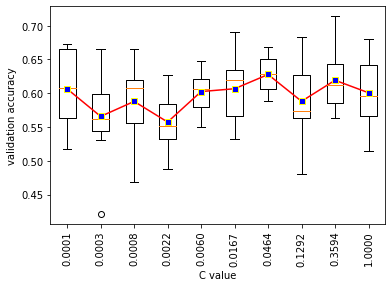

In [27]:
accuracy_list = []
accuracy_mean_list = []
for C in C_list:
        accuracy, accuracy_mean = trainingModel(result_eta_stochastic, C, solver_name, result_regularization_stochastic)
        accuracy_list.append(accuracy)
        accuracy_mean_list.append(np.mean(accuracy_mean))

plt.boxplot(accuracy_list)
plt.xticks(range(1,len(C_list)+1),['%.4f'%(c) for c in C_list],rotation='vertical')
plt.plot(range(1,len(C_list)+1),accuracy_mean_list,c = 'red')
plt.scatter(range(1,len(C_list)+1), accuracy_mean_list, marker='s',
            s=30,edgecolor='yellow',facecolor='blue',zorder=3)

plt.xlabel('C value')
plt.ylabel('validation accuracy')
plt.show()

&emsp; Visualize the performance of the classifier with different eta when C and regularization are the best values:

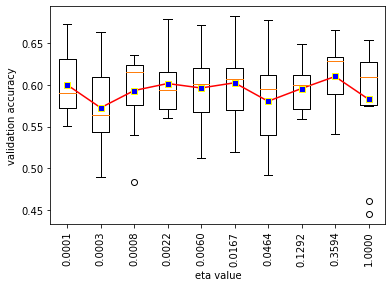

In [28]:
accuracy_list = []
accuracy_mean_list = []
for eta in eta_list:
        accuracy, accuracy_mean = trainingModel(eta, result_c_stochastic, solver_name, result_regularization_stochastic)
        accuracy_list.append(accuracy)
        accuracy_mean_list.append(np.mean(accuracy_mean))

plt.boxplot(accuracy_list)
plt.xticks(range(1,len(eta_list)+1),['%.4f'%(c) for c in eta_list],rotation='vertical')
plt.plot(range(1,len(eta_list)+1),accuracy_mean_list,c = 'red')
plt.scatter(range(1,len(eta_list)+1), accuracy_mean_list, marker='s',
            s=30,edgecolor='yellow',facecolor='blue',zorder=3)

plt.xlabel('eta value')
plt.ylabel('validation accuracy')
plt.show()

### 2.2.3 Newton's method model:

&emsp; The optimal parameters selection:

In [29]:
solver_name = HessianBinaryLogisticRegression

accuracy_max = -1
accuracy_list = []
accuracy_mean_list = []
result_eta_hessian = 0
result_c_hessian = 0
result_regularization_hessian = None

eta_list = np.logspace(-2,0,5)
C_list = np.logspace(-4,-1,5)
regularization_list = [None, 'L1', 'L2', 'L1&L2']

for eta in eta_list:
    for C in C_list:
        for regularization in regularization_list:
            accuracy, accuracy_mean = trainingModel(eta, C, solver_name, regularization)
            accuracy_list.append(accuracy)
            accuracy_mean_list.append(accuracy_mean)
            if accuracy_max <= accuracy_mean:
                accuracy_max = accuracy_mean
                result_eta_hessian = eta
                result_c_hessian = C
                result_regularization_hessian = regularization

print(f"best eta is: {result_eta_hessian}")
print(f"best C is: {result_c_hessian}")
print(f"best regularization is: {result_regularization_hessian}")
print(f"best accuracy max is: {accuracy_max}")

best eta is: 1.0
best C is: 0.01778279410038923
best regularization is: L2
best accuracy max is: 0.8147420655432648


&emsp; Visualize the performance of the classifier with different C when eta and regularization are the best values:

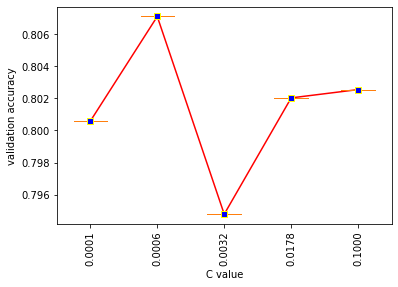

In [30]:
accuracy_list = []
accuracy_mean_list = []
for C in C_list:
        accuracy, accuracy_mean = trainingModel(result_eta_hessian, C, solver_name, result_regularization_hessian)
        accuracy_list.append(accuracy)
        accuracy_mean_list.append(np.mean(accuracy_mean))

plt.boxplot(accuracy_list)
plt.xticks(range(1,len(C_list)+1),['%.4f'%(c) for c in C_list],rotation='vertical')
plt.plot(range(1,len(C_list)+1),accuracy_mean_list,c = 'red')
plt.scatter(range(1,len(C_list)+1), accuracy_mean_list, marker='s',
            s=30,edgecolor='yellow',facecolor='blue',zorder=3)

plt.xlabel('C value')
plt.ylabel('validation accuracy')
plt.show()

&emsp; Visualize the performance of the classifier with different eta when C and regularization are the best values:

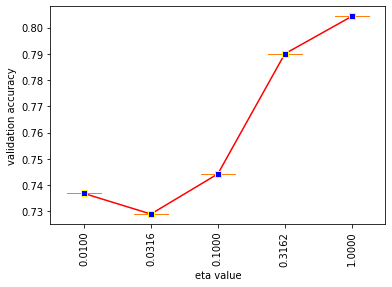

In [31]:
accuracy_list = []
accuracy_mean_list = []
for eta in eta_list:
        accuracy, accuracy_mean = trainingModel(eta, result_c_hessian, solver_name, result_regularization_hessian)
        accuracy_list.append(accuracy)
        accuracy_mean_list.append(np.mean(accuracy_mean))

plt.boxplot(accuracy_list)
plt.xticks(range(1,len(eta_list)+1),['%.4f'%(c) for c in eta_list],rotation='vertical')
plt.plot(range(1,len(eta_list)+1),accuracy_mean_list,c = 'red')
plt.scatter(range(1,len(eta_list)+1), accuracy_mean_list, marker='s',
            s=30,edgecolor='yellow',facecolor='blue',zorder=3)

plt.xlabel('eta value')
plt.ylabel('validation accuracy')
plt.show()

### 2.2.4 Quasi-Newton methods model:

&emsp; The optimal parameters selection:

In [32]:
solver_name = BFGSBinaryLogisticRegression

accuracy_max = -1
accuracy_list = []
accuracy_mean_list = []
result_eta_BFGS = 0
result_c_BFGS = 0
result_regularization_BFGS = None

eta_list = np.logspace(-4,0,10)
C_list = np.logspace(-4,0,10)
regularization_list = [None, 'L1', 'L2', 'L1&L2']

for eta in eta_list:
    for C in C_list:
        for regularization in regularization_list:
            accuracy, accuracy_mean = trainingModel(eta, C, solver_name, regularization)
            accuracy_list.append(accuracy)
            accuracy_mean_list.append(accuracy_mean)
            if accuracy_max <= accuracy_mean:
                accuracy_max = accuracy_mean
                result_eta_BFGS = eta
                result_c_BFGS = C
                result_regularization_BFGS = regularization

print(f"best eta is: {result_eta_BFGS}")
print(f"best C is: {result_c_BFGS}")
print(f"best regularization is: {result_regularization_BFGS}")
print(f"best accuracy is: {accuracy_max}")

best eta is: 0.000774263682681127
best C is: 0.046415888336127774
best regularization is: L2
best accuracy is: 0.8226506771425617


&emsp; Visualize the performance of the classifier with different C when eta and regularization are the best values:

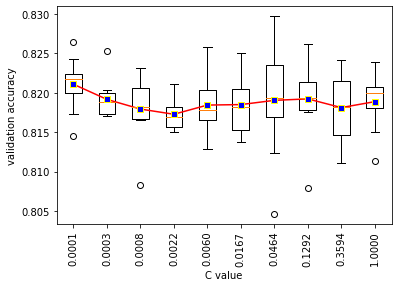

In [33]:
accuracy_list = []
accuracy_mean_list = []
for C in C_list:
        accuracy, accuracy_mean = trainingModel(result_eta_BFGS, C, solver_name, result_regularization_BFGS)
        accuracy_list.append(accuracy)
        accuracy_mean_list.append(np.mean(accuracy_mean))

plt.boxplot(accuracy_list)
plt.xticks(range(1,len(C_list)+1),['%.4f'%(c) for c in C_list],rotation='vertical')
plt.plot(range(1,len(C_list)+1),accuracy_mean_list,c = 'red')
plt.scatter(range(1,len(C_list)+1), accuracy_mean_list, marker='s',
            s=30,edgecolor='yellow',facecolor='blue',zorder=3)

plt.xlabel('C value')
plt.ylabel('validation accuracy')
plt.show()

&emsp; Visualize the performance of the classifier with different eta when C and regularization are the best values:

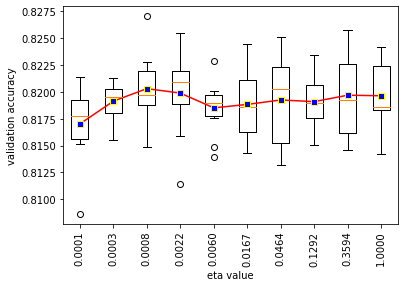

In [34]:
accuracy_list = []
accuracy_mean_list = []
for eta in eta_list:
        accuracy, accuracy_mean = trainingModel(eta, result_c_BFGS, solver_name, result_regularization_BFGS)
        accuracy_list.append(accuracy)
        accuracy_mean_list.append(np.mean(accuracy_mean))

plt.boxplot(accuracy_list)
plt.xticks(range(1,len(eta_list)+1),['%.4f'%(c) for c in eta_list],rotation='vertical')
plt.plot(range(1,len(eta_list)+1),accuracy_mean_list,c = 'red')
plt.scatter(range(1,len(eta_list)+1), accuracy_mean_list, marker='s',
            s=30,edgecolor='yellow',facecolor='blue',zorder=3)

plt.xlabel('eta value')
plt.ylabel('validation accuracy')
plt.show()

### 2.2.5 Is your method of selecting parameters justified? That is, do you think there is any "data snooping" involved with this method of selecting parameters?

&emsp; The data snooping is known as a form of statistical bias that artificially obtain statistically significant results   base or data or analysis. The existence of data snooping is the main reason that cause the occurrence of overfitting. Therefore, we should check whether our model is overfitted in order to determine whether the data snooping is involved.

In [35]:
object_list_1 = ShuffleSplit(n_splits=iterations_num, train_size=0.8, test_size=0.2)
object_list_2 = ShuffleSplit(n_splits=iterations_num, train_size=0.8, test_size=0.2)

new_classifier_object = MultiClassLogisticRegression(eta=result_eta_BFGS, iterations=10, 
                 C=result_c_BFGS, solver=BFGSBinaryLogisticRegression, regularization=result_regularization_BFGS)

accuracy = []
accuracy_mean = 0

for train_indices, test_indicest in object_list_1.split(x,y):
    new_classifier_object.fit(x[train_indices], y[train_indices])
    y_hat = new_classifier_object.predict(x[test_indices])
    accuracy.append(mt.accuracy_score(y[test_indices],y_hat))

accuracy_mean = np.mean(accuracy)
print(f"test one accuracy is: {accuracy_mean}")

new_accuracy = []
new_accuracy_mean = 0
for _, test_indices in object_list_2.split(x,y):
    y_hat = new_classifier_object.predict(x[test_indices])
    new_accuracy.append(mt.accuracy_score(y[test_indices],y_hat))
    
new_accuracy_mean = np.mean(new_accuracy)
print(f"test two accuracy is: {new_accuracy_mean}")

test one accuracy is: 0.8235604259278404
test two accuracy is: 0.8190013439470691


&emsp; We have defined two pairs of training and testing sets above base on our model. One pair of training and testing set is used to obtain the common prediction result of our model, the other pair of training and testing set is used to produce another prediction result as a control data. As we can see, the prediction accuracy of two airs of training and testing sets is quite similar, which represents our model is not overfitted. Therefore, we can conduct that the data snooping was not involved in selecting parameters by us.

## 2.3 Compare with scikit-learn:

In [36]:
%%time

accuracy_scikit_learn = []
accuracy_mean = 0

scikit_learn_object = SKLogisticRegression()
for train_indices, test_indices in object_list.split(x,y):
    scikit_learn_object.fit(x[train_indices],y[train_indices])
    yhat = scikit_learn_object.predict(x[test_indices])
    accuracy_scikit_learn.append(accuracy_score(y[test_indices],yhat))
accuracy_mean = np.mean(accuracy_scikit_learn)
print(f"The accuracy is: {accuracy_mean}")

The accuracy is: 0.8145353044557014
CPU times: total: 125 ms
Wall time: 686 ms


In [37]:
%%time

classifier_object = MultiClassLogisticRegression(eta=result_eta_BFGS, iterations=10, 
                 C=result_c_BFGS, solver=BFGSBinaryLogisticRegression, regularization=result_regularization_BFGS)

accuracy = []
accuracy_mean = 0

for train_indices, test_indicest in object_list.split(x,y):
    classifier_object.fit(x[train_indices], y[train_indices])
    y_hat = classifier_object.predict(x[test_indices])
    accuracy.append(accuracy_score(y[test_indices],y_hat))

accuracy_mean = np.mean(accuracy)
print(f"test two accuracy is: {accuracy_mean}")

test two accuracy is: 0.8195079086115993
CPU times: total: 219 ms
Wall time: 864 ms


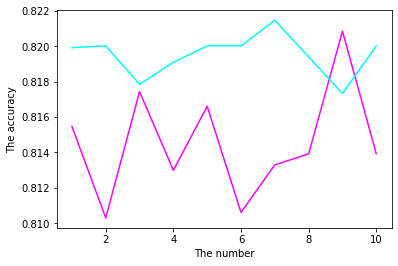

In [38]:
plt.plot(range(1,iterations_num+1),accuracy_scikit_learn,c = 'magenta')
plt.plot(range(1,iterations_num+1),accuracy,c = 'cyan')
plt.xlabel('The number')
plt.ylabel('The accuracy')

plt.show()

&emsp; As the accuracy result shown above, we could know that there is no too much difference between the prediction accurary of our best optimization procedure and the procedure using scikit-learn. However, according the graph above, it seems the prediction accuracy produced by our procedure is relatively stable as the number of iterations increases. Now, let's check the spent time of two procedure, it is obvious that the scikit-learn procedure can produce prediction result faster than our best optimization procedure. The main reason resulting in this situation is that the scikit-learn has implement their procedure base on C++, which will take CPU less time to complie than Python.

# 3. Deployment:

&emsp; As we have mentioned in the last part. Our implementation will produce prediction result with more stable accuracy, yet implementation of scikit-learn will produce prodiction result faster than ours. Therefore, we recommend our users to use the implementation of scikit-learn if they plan to deploy machine learning model for online analysis in the sales process. Because the customers of webshop would rather choose the merchants who could provide feedback to them without too much delay. However, if our users try to deploy machine learning model for offline analysis before the diamond processing, we would like to recommend our implementation. Because the diamond processing company may prefer the accuracy of preliminary price estimate for the diamond, instead of immediately processing a newly unearthed diamond.

# 4. Exceptional work:

&emsp; Choosing using mean square error as objective function instead of maximum likelihood:<br>
&emsp; Because of:

$$ \mathbf{H}_{j,k}(\mathbf{w}) = \frac{\partial}{\partial w_k} \underbrace{\frac{\partial}{\partial w_j}l(\mathbf{w})}_{\text{first derivative}} $$

$$ \mathbf{J}(\mathbf{w}) = \sum_i \left(y^{(i)}-g(\mathbf{w}^T\cdot\mathbf{x}^{(i)})\right)^{2} $$

&emsp; And:

$$ \frac{\partial}{\partial w_j}J(\mathbf{w}) = \sum_i \left(-2*\left[y^{(i)}-g(\mathbf{w}^T\cdot\mathbf{x}^{(i)}) - g(\mathbf{w}^T\cdot\mathbf{x}^{(i)})^2 -
y^{(i)}-g(\mathbf{w}^T\cdot\mathbf{x}^{(i)})^2 - g(\mathbf{w}^T\cdot\mathbf{x}^{(i)})^3
\right]\right)x_j^{(i)} $$

&emsp; As a result:

$$
\begin{split}
\mathbf{H}_{j,k}(\mathbf{w}) & = \frac{\partial}{\partial w_j} \sum_i \left(-2*\left[y^{(i)}-g(\mathbf{w}^T\cdot\mathbf{x}^{(i)}) - g(\mathbf{w}^T\cdot\mathbf{x}^{(i)})^2 -
y^{(i)}-g(\mathbf{w}^T\cdot\mathbf{x}^{(i)})^2 - g(\mathbf{w}^T\cdot\mathbf{x}^{(i)})^3
\right]\right)x_j^{(i)} \\
& = \sum_{i=1}^M \left[-2*\left[ y^{(i)}-2*g(\mathbf{w}^T\cdot\mathbf{x}^{(i)})-
2*y^{(i)}*g(\mathbf{w}^T\cdot\mathbf{x}^{(i)}) + 3*g(\mathbf{w}^T\cdot\mathbf{x}^{(i)})^2\right]
*g(\mathbf{w}^T\cdot\mathbf{x}^{(i)}) \left(1-g(\mathbf{w}^T\cdot\mathbf{x}^{(i)})\right)\right]
x_k^{(i)}x_j^{(i)}\\
\end{split}
$$

In [39]:
class HessianBinaryLogisticRegression(BinaryLogisticRegression):
    # just overwrite gradient function
    def _get_gradient(self,X,y):
        g = self.predict_proba(X,add_bias=False).ravel() # get sigmoid value for all classes
        hessian = X.T @ np.diag(-2*(3*g*g-2*g*y-2*g+y)*g*(1-g)) @ X

        ydiff = y-g # get y difference
        gradient = np.sum(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        gradient = gradient.reshape(self.w_.shape)
        
        if self.regularization == 'L1':
            hessian = X.T @ np.diag(-2*(3*g*g-2*g*y-2*g+y)*g*(1-g)) @ X 
            gradient[1:] += -self.C
        elif self.regularization == 'L2':
            hessian = X.T @ np.diag(-2*(3*g*g-2*g*y-2*g+y)*g*(1-g)) @ X - 2 * self.C
            gradient[1:] += -2 * self.w_[1:] * self.C
        elif self.regularization == 'L1&L2':
            hessian = X.T @ np.diag(-2*(3*g*g-2*g*y-2*g+y)*g*(1-g)) @ X - self.C
            gradient[1:] += -self.C -2 * self.w_[1:] * self.C
        
        return pinv(hessian) @ gradient

In [40]:
solver_name = HessianBinaryLogisticRegression

accuracy_max = -1
accuracy_list = []
accuracy_mean_list = []
result_eta = 0
result_c = 0
result_regularization = None

eta_list = np.logspace(-2,0,5)
C_list = np.logspace(-4,-1,5)
regularization_list = [None, 'L1', 'L2', 'L1&L2']

for eta in eta_list:
    for C in C_list:
        for regularization in regularization_list:
            accuracy, accuracy_mean = trainingModel(eta, C, solver_name, regularization)
            accuracy_list.append(accuracy)
            accuracy_mean_list.append(accuracy_mean)
            if accuracy_max <= accuracy_mean:
                accuracy_max = accuracy_mean
                result_eta = eta
                result_c = C
                result_regularization = regularization

print(f"best eta is: {result_eta}")
print(f"best C is: {result_c}")
print(f"best regularization is: {result_regularization}")
print(f"best accuracy is: {accuracy_max}")

best eta is: 0.31622776601683794
best C is: 0.01778279410038923
best regularization is: L2
best accuracy is: 0.8105034632482166


&emsp; We have double checked our equation and make sure it is correct. As we can see above, the prediction accuracy is in the sufficient range, if we using mean square error to implement objective function. However, it is still lower than the accuracy of prediction produced by objective function using maximum likelihood estimation. What's more, maximum likelihood estimation is a method of estimating the parameters of an assumed probability distribution given some observed data. This is done by maximizing the likelihood function so that the observed data is most probable under the assumed statistical model. Therefore, we prefer maximum likelihood estimation.